# Objective:
### - To develop a a classification model using Artificial Neural Networks (ANNs) to classify data points from the "Alphabets_data.csv" dataset into predefined categories of alphabets.
---

## Importing necessary libraries:
---

In [329]:
import pandas as pd                                               # Data manipulation and analysis
import numpy as np                                                # Statistical analysis/Numerical python
import matplotlib.pyplot as plt                                   # Data visualization
import seaborn as sns                                             # Enhanced visualization
from sklearn.preprocessing import StandardScaler, LabelEncoder    # Preprocessing techniques
from sklearn.model_selection import train_test_split              # To split dataset into train and test sets
import tensorflow as tf                                           # Tensorflow
from tensorflow import keras                                      # Keras
import warnings
warnings.filterwarnings('ignore')                                 # Ignore warning disclaimer

In [330]:
# Uploading and displaying dataset using pandas:
df = pd.read_csv('Alphabets_data.csv')                 # Stored in object df(DataFrame)
df.head(10)                                            # Displays first 10 rows of the data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


## Understanding the dataset:
 - An alphabet dataset where **letter is the target variable** and each letter has it's characteristics displayed as features in remaining columns:
 - xbox – Horizontal position of the center of the letter’s bounding box.
 - ybox – Vertical position of the center of the letter’s bounding box.
 - width – Width of the letter’s bounding box.
 - height – Height of the letter’s bounding box.
 - onpix – Number of "on" pixels (i.e., black pixels in a binary image) inside the letter’s bounding box.
 - xbar – Mean horizontal stroke position within the bounding box.
 - ybar – Mean vertical stroke position within the bounding box.
 - x2bar – Variance of the horizontal stroke positions.
 - y2bar – Variance of the vertical stroke positions.
 - xybar – Mean product of horizontal and vertical stroke positions (a measure of slant).
 - x2ybar – Variance of horizontal and vertical product positions (higher-order slant measure).
 - xy2bar – Another higher-order measure capturing shape and orientation.
 - xedge – Number of edges in the horizontal direction.
 - xedgey – Correlation of horizontal edge count with vertical position.
 - yedge – Number of edges in the vertical direction.
 - yedgex – Correlation of vertical edge count with horizontal position.

## EDA:
---

In [333]:
# Structure of the dataset:
df.shape

(20000, 17)

**There are total of 20K rows and 17 columns**

In [335]:
# Information on the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


**Data is clean meaning there are no null values and has correct datatype for each column**

In [337]:
# All columns:
df.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [338]:
# Descriptive Statistics:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


## Insights:
 - Dataset contains 20,000 samples and 16 Numerical columns.
 - Most features have values ranging from 0 to 15, indicating a fixed range scale.
 - The mean and median (50% Quantile) values are so close for most features, suggesting a relatively symmetrical distribution.
 - Some features have a minimum value of 0 indicating missing or faulty data especially for width and height features.
 - Overall the dataset seems well-distributed with no extreme values showing any signs of skewness.

In [340]:
# Duplicate values:
df.duplicated().sum()

1332

In [341]:
df[df.duplicated()]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
627,I,3,7,4,5,2,7,7,0,7,13,6,8,0,8,1,7
724,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
730,I,1,9,0,6,0,7,7,4,4,7,6,8,0,8,0,8
910,X,5,11,6,8,2,7,7,5,4,7,6,8,3,8,4,8
943,O,2,3,2,1,1,8,7,6,4,9,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


**There are 1332 duplicate rows, however; the values of the feature for same target letter are different, may contain valuable information and will choose not to drop these rows.**

In [343]:
# Target class distribution:
df['letter'].value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: letter, dtype: int64

**The class distribution is very balanced showing not much difference between the most frequent letter "U"(813) and least frequent letter "Z"(734).**

In [345]:
# Check for missing values:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

**There are no NaN values in the dataset.**

## Data visualization:
---

### Histogram distribution plot:

In [349]:
# Create a function to visualize all numerical columns plot:

def histplot(data, columns):           # Defined function histplot(parameters)
    for col in columns:                # For loop
        plt.figure(figsize=(8,8))      # Configured plot figure size
        sns.histplot(data=data,x=data[col],bins=15,kde=True,color='dodgerblue')    # Visual plot

        skewness = data[col].skew()    # Calculates skew for every column iteration by iteration

        # Skewness type:
        if skewness >= 1:
            skew_text = 'Right Skewed ->'
            text_x = data[col].max() - (data[col].max() * 0.5)   # Text position
        elif skewness <= -1:
            skew_text = '<- Left Skewed'
            text_x = data[col].min() + (data[col].max() * 0.1)   # Text position
        else:
            skew_text = "Approximately Normally Distributed"
            text_x = data[col].median()                          # Text center position

        # Add annotation:
        plt.text(text_x, plt.ylim()[1] * 0.8, skew_text, fontsize=12, fontweight='bold', color='black')

        plt.xlabel(f"Distribution plot of {col}", fontsize=12)   # X axis label
        plt.title("Histogram Plot")    # Title name
        
        plt.show()     # Display the plot

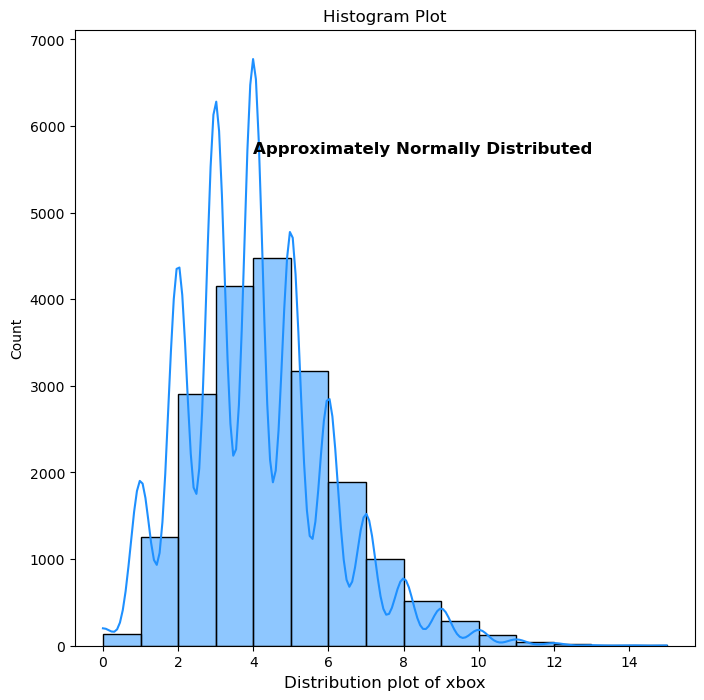

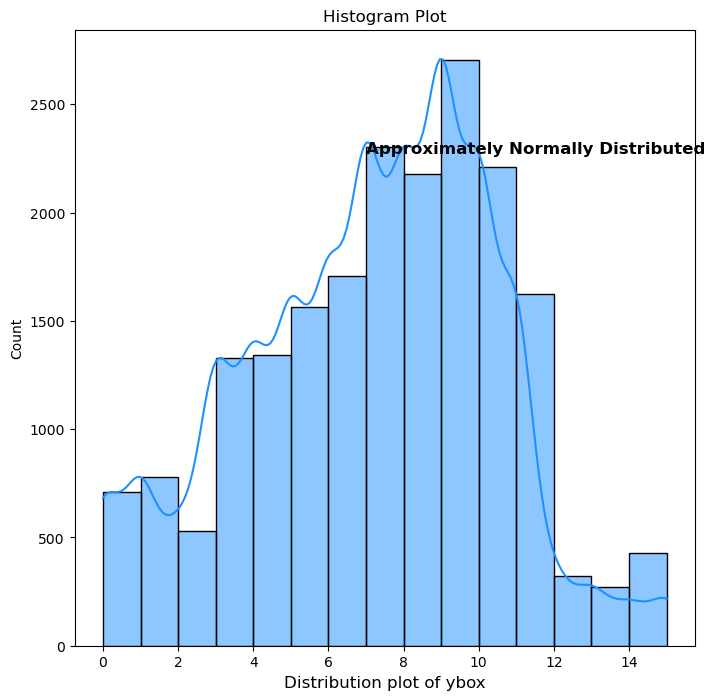

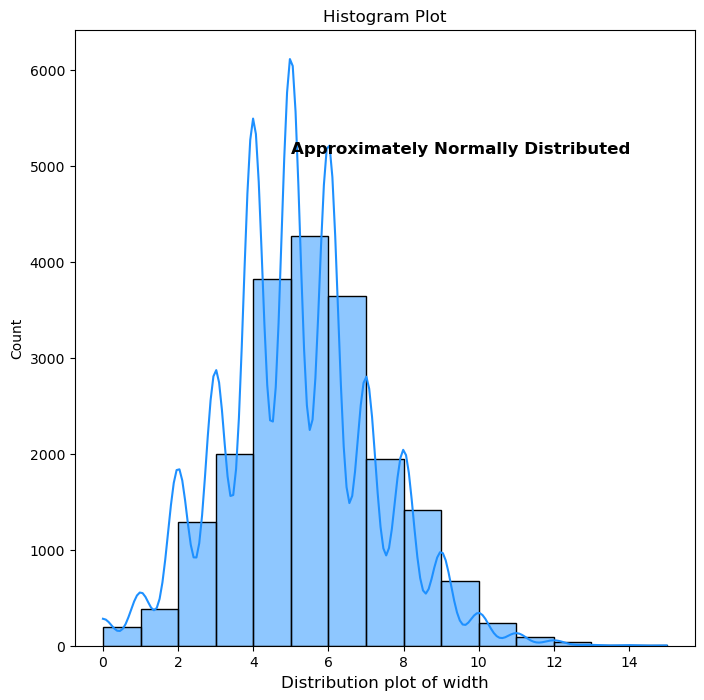

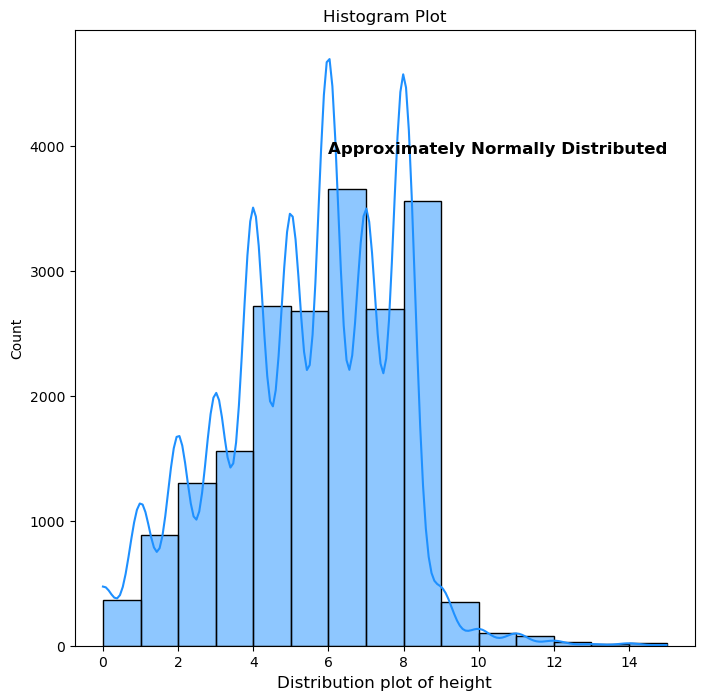

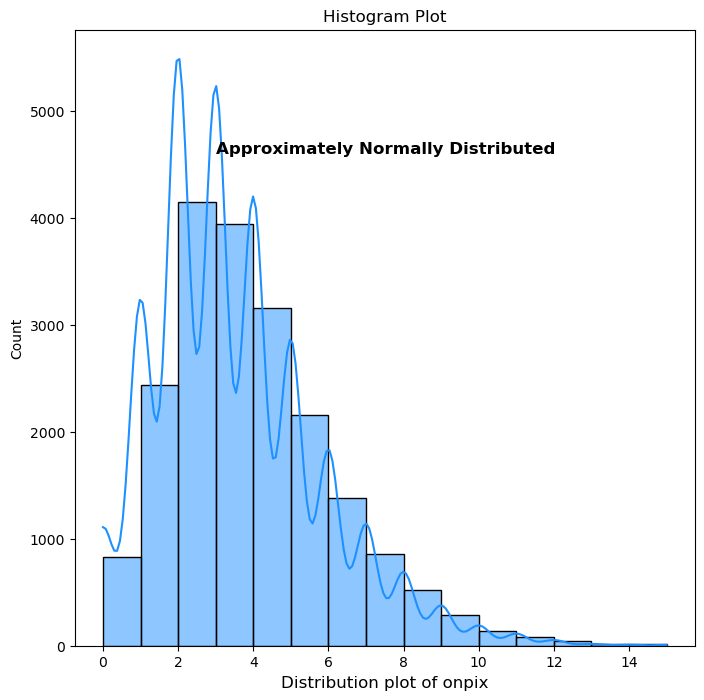

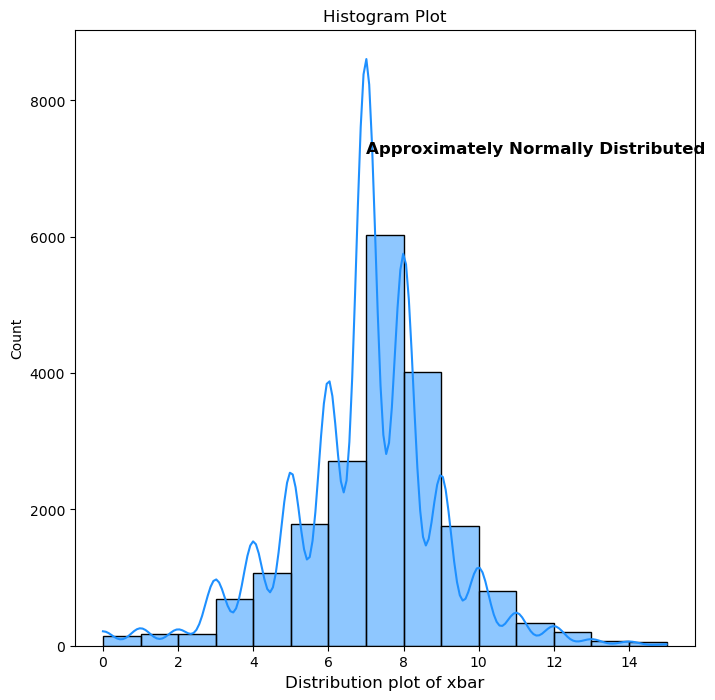

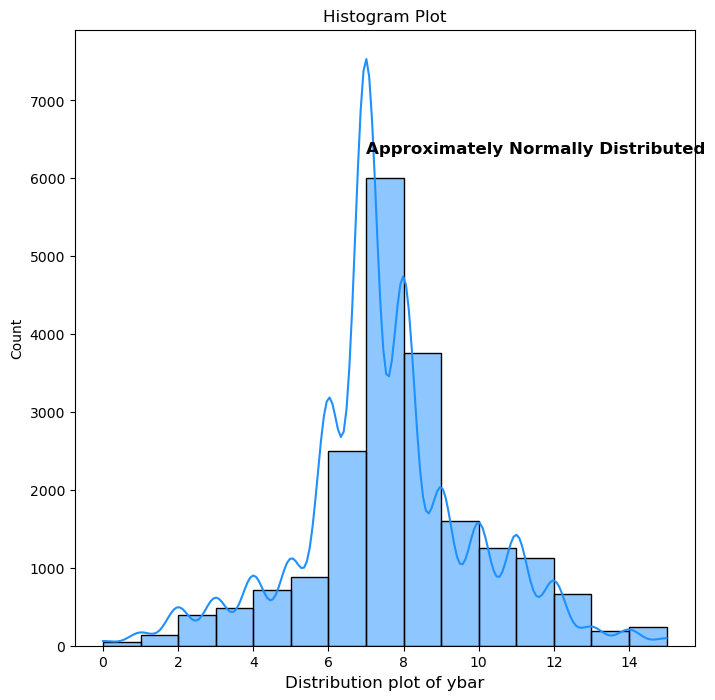

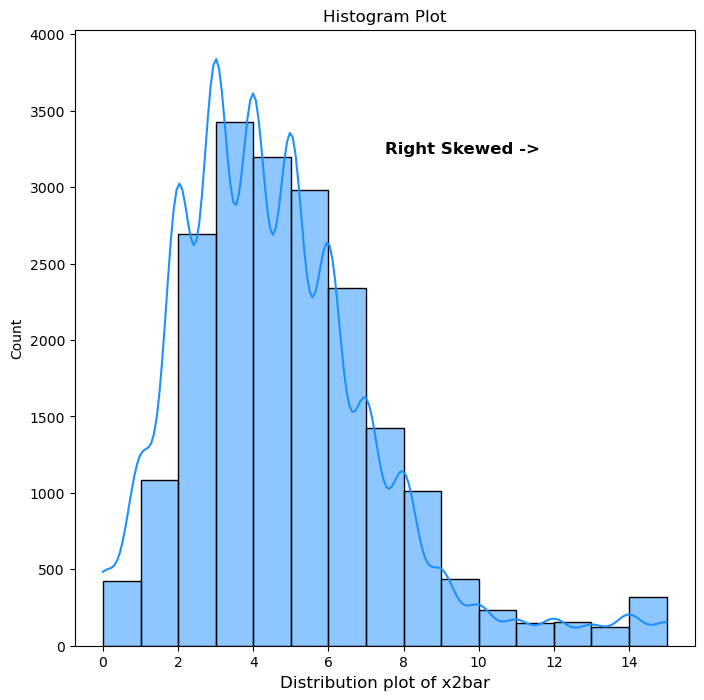

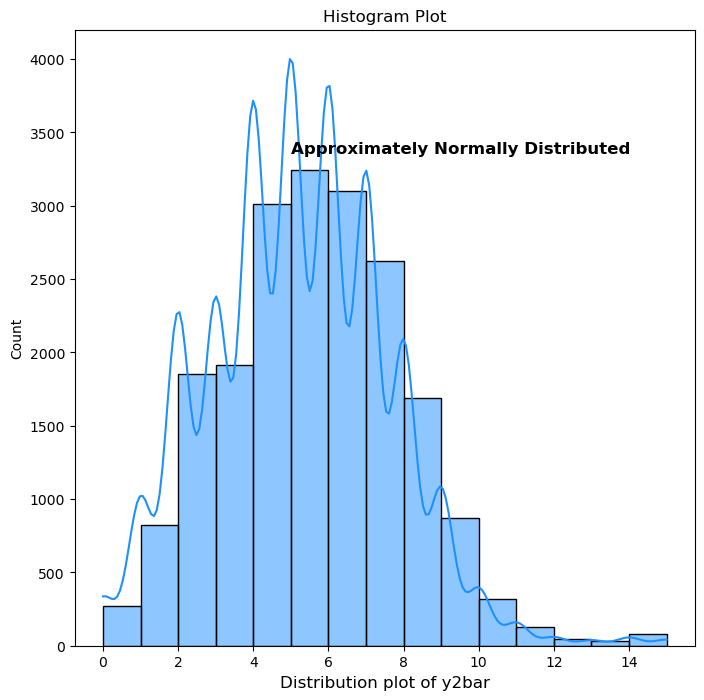

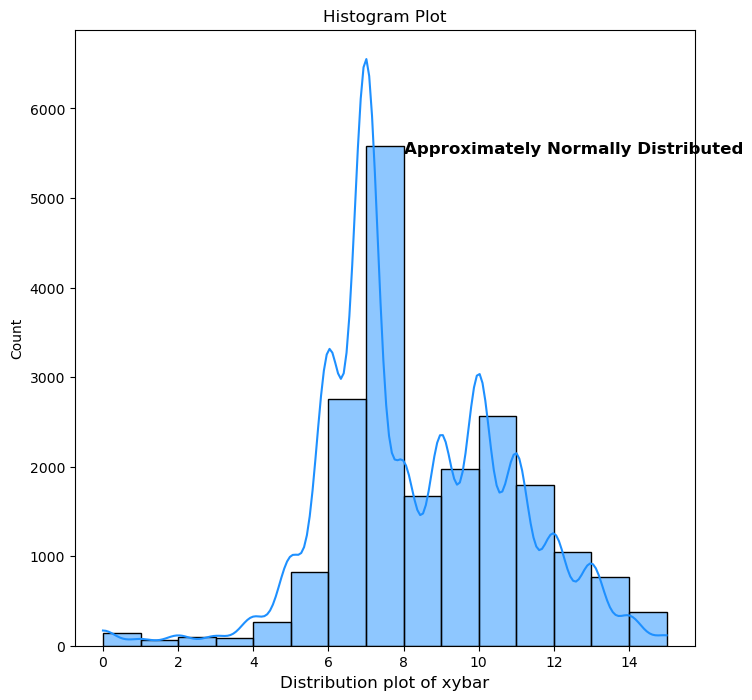

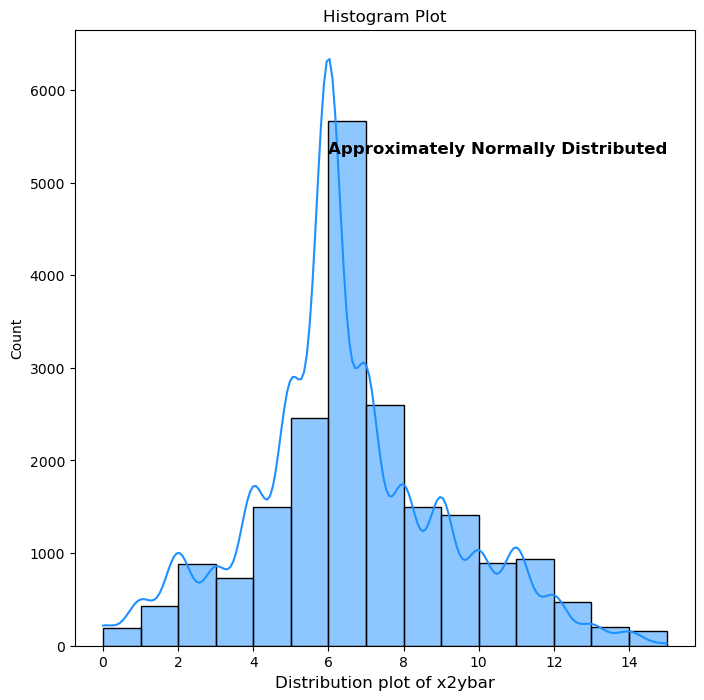

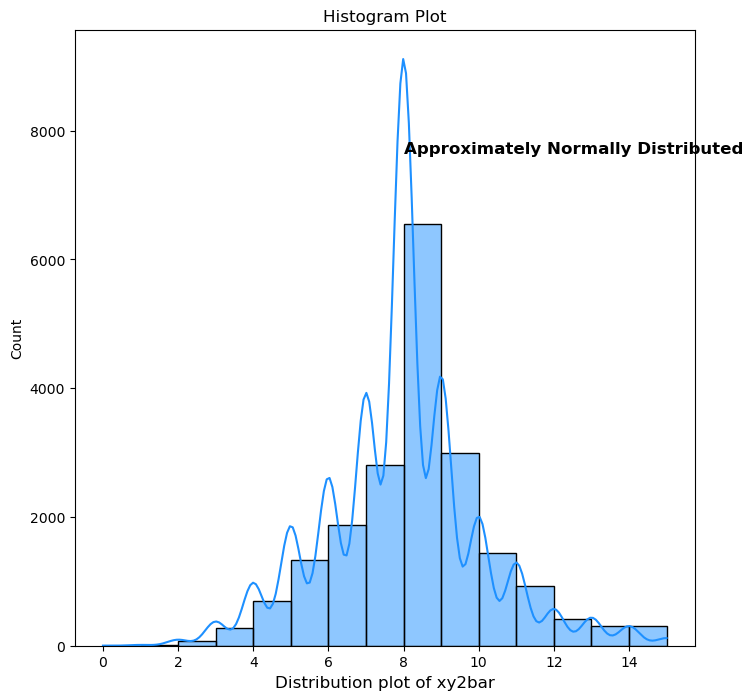

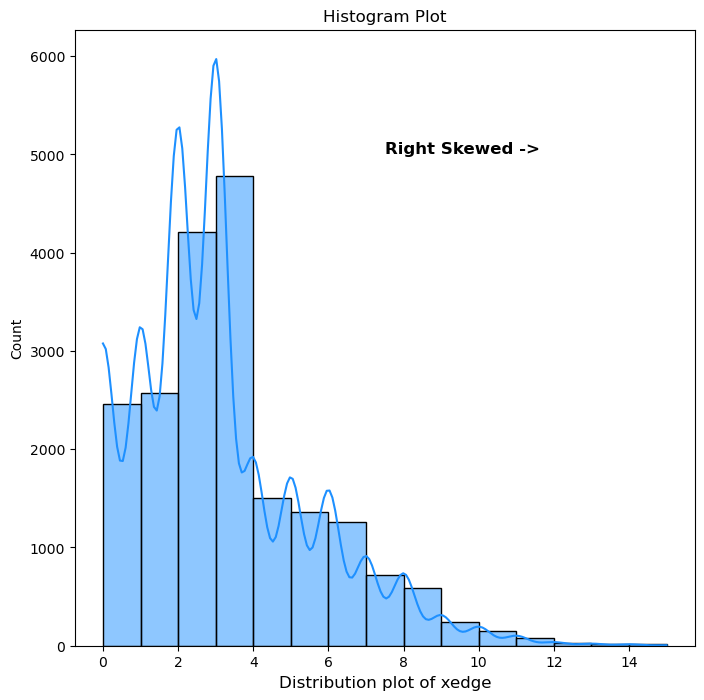

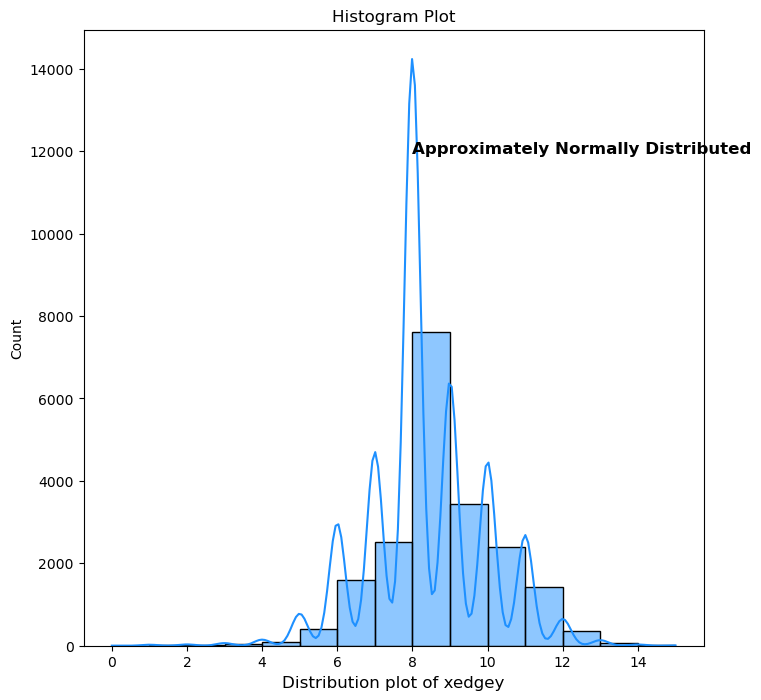

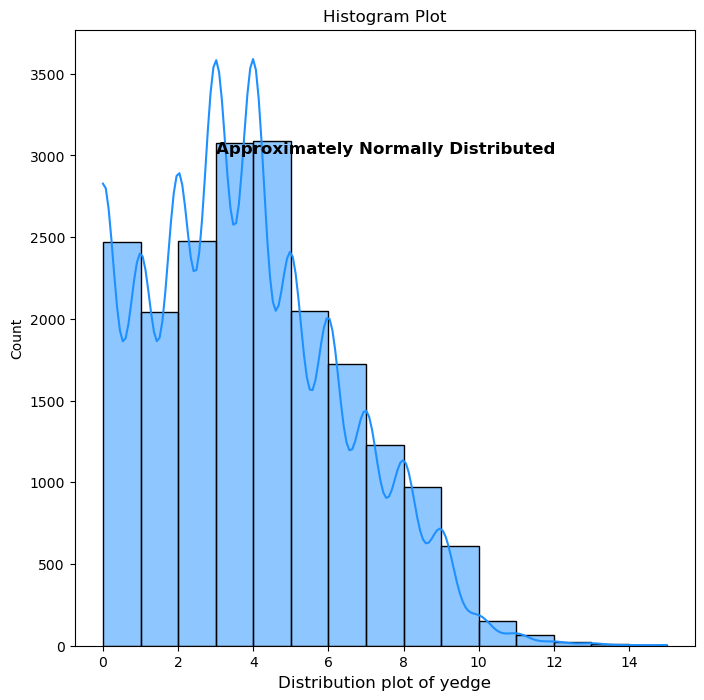

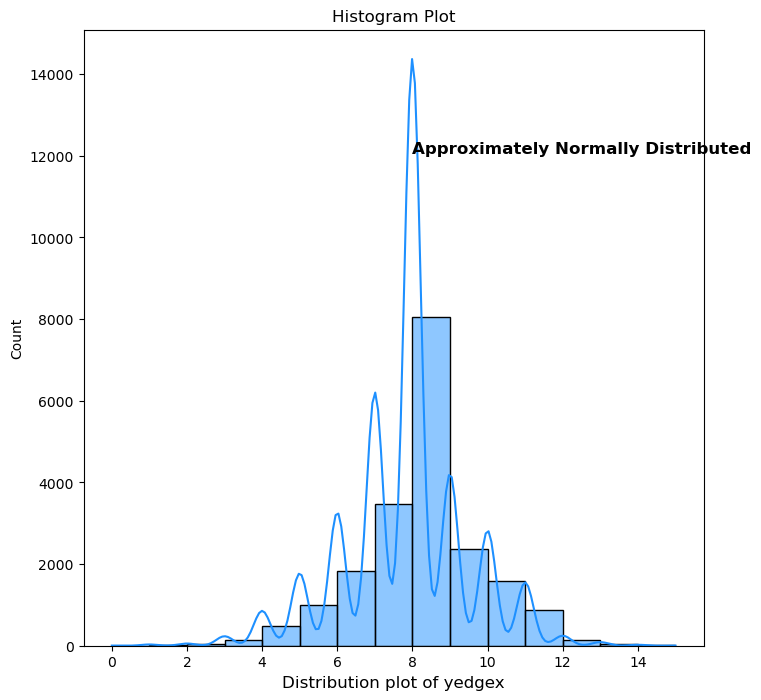

In [350]:
# Run the function:
df_temp = df.select_dtypes(include='number')

histplot(df_temp, df_temp.columns)

### **The overall distribution is normal except for x2bar and xedge columns, however; ANN can handle skewness and features will scaled to a certain range once preprocessed.**

### CountPlot to check Target distribution:

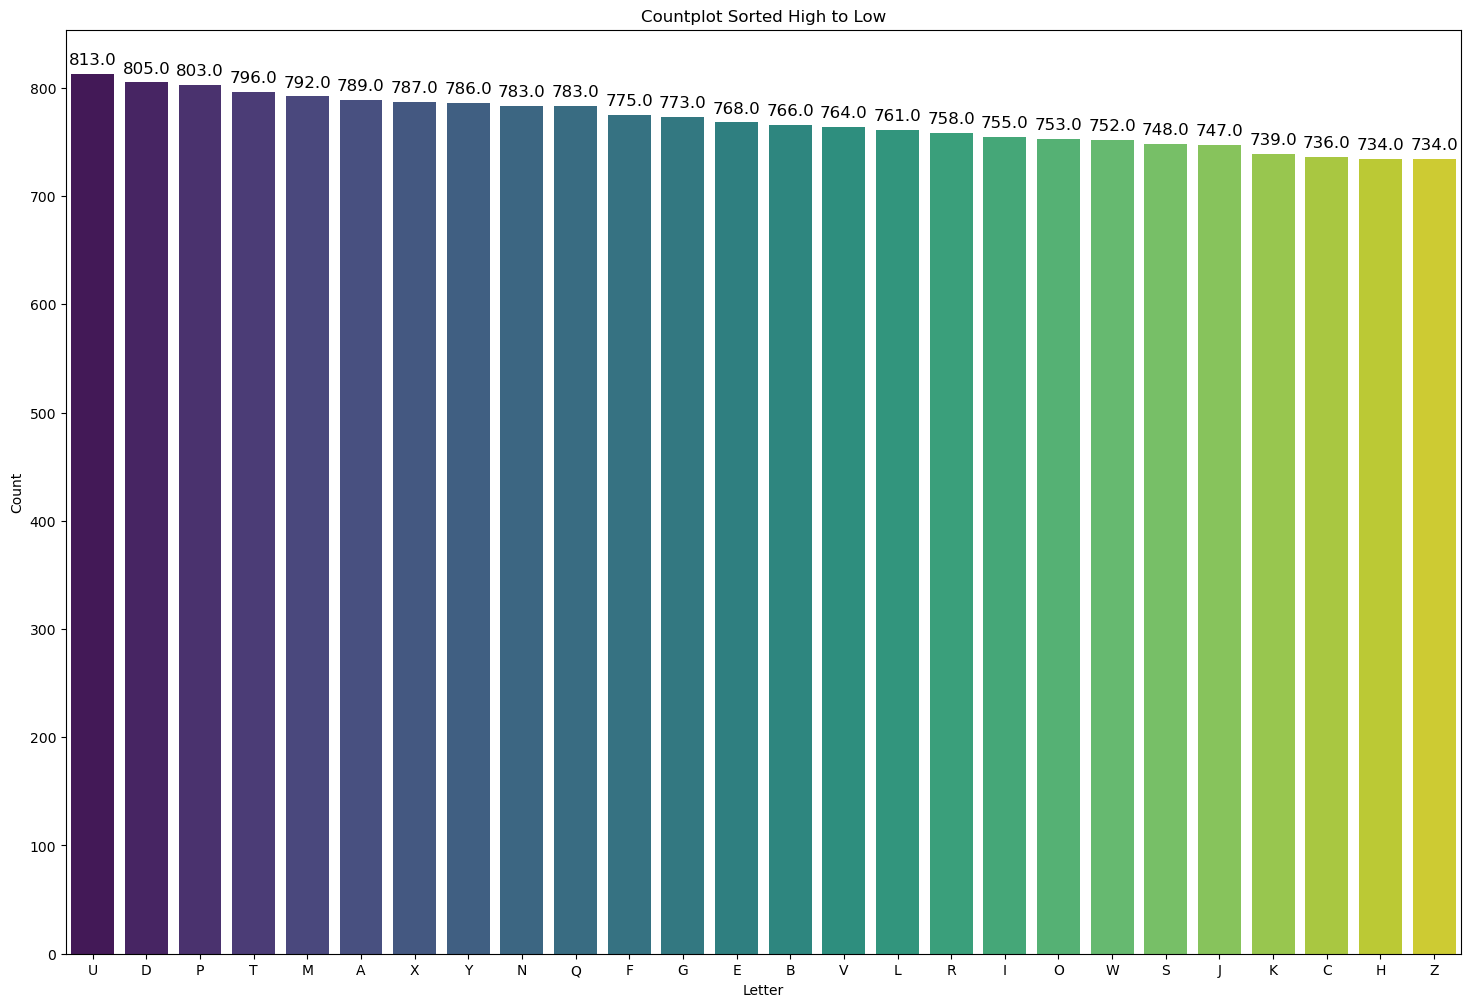

In [353]:
# Count occurrences and sort
sorted_counts = df['letter'].value_counts().sort_values(ascending=False)

# Plot with sorted order
plt.figure(figsize=(18, 12))
ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette='viridis')

# Rotating x-axis tick labels to 90 degrees for better readability
ax.set_xticklabels(ax.get_xticklabels())

# Looping through each bar (patch) in the countplot to add count labels on top
for p in ax.patches:
    # Annotating each bar with its count (height of the bar)
    ax.annotate(f"{p.get_height()}",
                (p.get_x() + p.get_width()/2., p.get_height()),  # Position of the label (centered on top of the bar)
                ha='center', va='center',  # Aligning the label in the center horizontally and vertically
                fontsize=12, color='black',  # Setting label font size and color
                xytext=(0, 10), textcoords='offset points')  # Adjusting the label position slightly above the bar

# Labels and title
plt.xlabel('Letter')
plt.ylabel('Count')
plt.title('Countplot Sorted High to Low')
plt.show()

### **Distribution shows letter U has the highest count with letter Z having the lowest, however; the distribution shows a balanced class.**

## Outlier Detection:
---

In [356]:
# Using Isolation Forest, will detect and treat outliers in the dataset:
from sklearn.ensemble import IsolationForest  # import the package
isof = IsolationForest(random_state=42, contamination='auto')  # initialize the package

In [357]:
# Detect outliers:
outliers = isof.fit_predict(df_temp)  # Where 1 = inliers and 0 = outliers

In [358]:
df['outlier'] = outliers        # New column for outlier value
df[df['outlier'] == -1]         # Filter shows outliers only

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,outlier
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8,-1
26,M,7,11,11,8,9,3,8,4,5,10,11,10,10,9,5,7,-1
27,W,12,14,12,8,5,9,10,4,3,5,10,7,10,12,2,6,-1
30,L,2,3,3,4,1,0,1,5,6,0,0,6,0,8,0,8,-1
51,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19951,A,6,10,7,6,3,12,0,4,1,11,4,12,4,4,3,11,-1
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10,-1
19976,L,3,8,3,6,2,0,2,4,6,1,0,8,0,8,0,8,-1
19979,M,6,9,10,7,12,7,5,3,2,7,5,8,15,7,4,6,-1


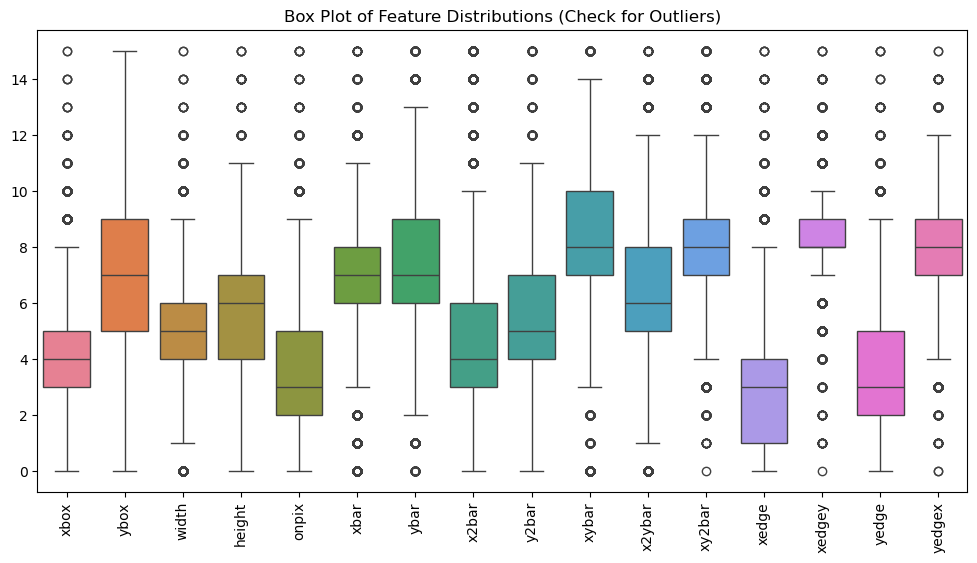

In [359]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=['letter', 'outlier']))  # Exclude categorical data
plt.xticks(rotation=90)
plt.title("Box Plot of Feature Distributions (Check for Outliers)")
plt.show()

### Apply winsorization to the outliers:

In [361]:
from scipy.stats.mstats import winsorize

# Define the limits (5% and 95%)
df1 = df.copy()
for col in df1.select_dtypes(include=['int64', 'float64']).columns:
    if col != 'letter':  # leaving target variable
        df1[col] = winsorize(df1[col], limits=[0.05, 0.05])  # Capping at 5th & 95th percentiles

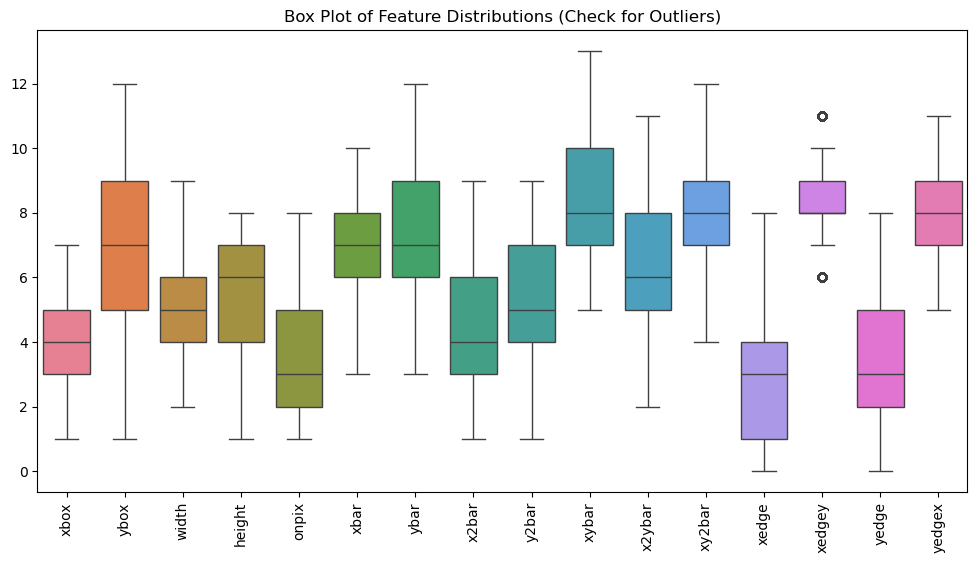

In [362]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1.drop(columns=['letter', 'outlier']))  # Exclude categorical data
plt.xticks(rotation=90)
plt.title("Box Plot of Feature Distributions (Check for Outliers)")
plt.show()

#### **The boxplot now is much cleaner of outliers after winsorization preserving valuable datapoints.**

In [364]:
# Will drop the outlier column now:
df1.drop(columns='outlier',axis=1,inplace=True)

In [365]:
# Confirm the changes:
df1.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,12,1,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,5,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


## Feature Selection:
---

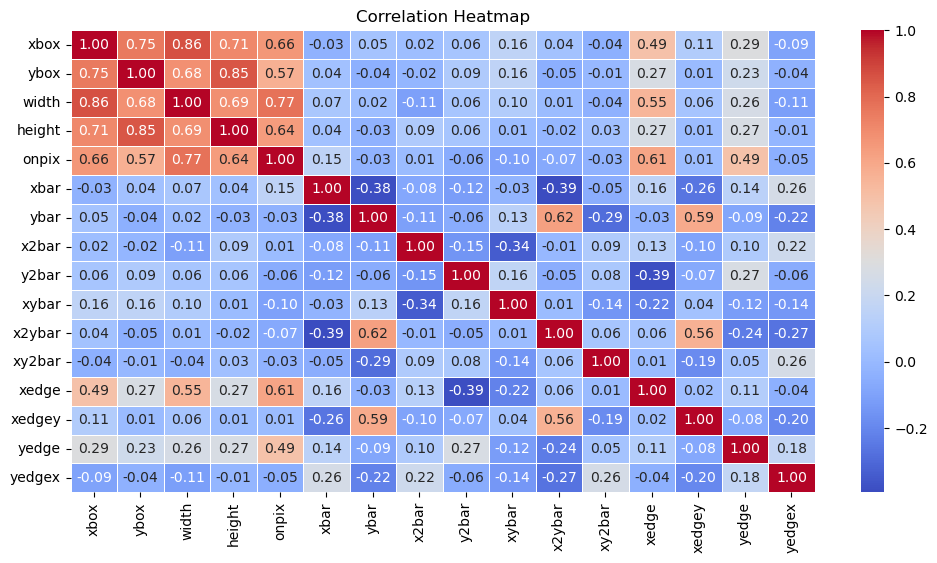

In [367]:
# Correlation heatmap for features:
df1_numeric = df1.select_dtypes(include='number')

df1_corr = df1_numeric.corr()    # Calculate correlation matrix

# Plot the visual:
plt.figure(figsize=(12,6))
sns.heatmap(data=df1_corr,cmap='coolwarm',annot=True,fmt='.2f',linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Insights:
 - High Correlation Between Features:
   - xbox, ybox, width, height, onpix are strongly correlated (above 0.6–0.8).
   - xedge and width also have a high correlation (~0.55).
   - xbar and ybar are negatively correlated (-0.38), which might indicate some redundancy.

In [369]:
# VIF scores:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Build VIF:
VIF = pd.DataFrame()
VIF['Features'] = df1_numeric.columns
VIF['Score'] = [variance_inflation_factor(df1_numeric.values, i) for i in range(len(df1_numeric.columns))]

# Display VIF
print(VIF)

   Features      Score
0      xbox  40.367205
1      ybox  29.351478
2     width  59.825381
3    height  37.198213
4     onpix  19.603852
5      xbar  20.034934
6      ybar  30.525918
7     x2bar   6.478831
8     y2bar   9.503696
9     xybar  18.622048
10   x2ybar  19.748111
11   xy2bar  21.982047
12    xedge   8.016184
13   xedgey  52.304823
14    yedge   6.417850
15   yedgex  37.316449


**All the features show high VIF scores, however; ANN handles multicollinearity internally**

## Model Building Stage:
---

In [396]:
# Display data:
df1.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,12,1,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,5,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


#### Train-Test-Split:

In [398]:
# Will split the dataset into train and test sets:
from sklearn.model_selection import train_test_split     # import package
X = df1.drop(columns='letter',axis=1)                    # Features
y = df1['letter']                                        # Target

In [402]:
# Splitting into training and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Feature Scaling:

In [406]:
# Will use Standard Scaler on X_train and X_test:
from sklearn.preprocessing import StandardScaler     # import package
scaler = StandardScaler()                            # initialize scaler

# Apply the scaling:
X_train_scaled = scaler.fit_transform(X_train)       # fit_transform on train set
X_test_scaled = scaler.transform(X_test)             # always only transform on test set

#### Target encoding:

In [413]:
# Will Label Encoder on y_train and y_test:
from sklearn.preprocessing import LabelEncoder      # import package
le = LabelEncoder()                                 # initialize encoder

# Apply encoding:
y_train_encoded = le.fit_transform(y_train)         # fit_transform on train set
y_test_encoded = le.transform(y_test)               # always only transform on test set

### Building ANN model:

In [418]:
# Import the libraries:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential     # to create a sequential ANN model
from tensorflow.keras.layers import Dense          # fully connected layers (dense layers)

In [421]:
# Initialize the model:
ann = Sequential()

# Adding the first hidden layer
 #- 8 neurons 
 #- ReLU activation
 #- input shape:input features

ann.add(Dense(units=32, activation='relu', input_shape=(X_train_scaled.shape[1],)))   # First hidden layer
ann.add(Dense(units=16, activation='relu'))   # Second hidden layer

# Output later:
ann.add(Dense(units=26, activation='softmax'))

In [423]:
# Compile the model:
ann.compile(optimizer='adam',  # Adam optimizer for efficient learning 
            loss='sparse_categorical_crossentropy', # Loss function for multi-class classification
            metrics=['accuracy'])  # Track accuracy during training

In [425]:
# Train the model:
model = ann.fit(X_train_scaled, y_train_encoded, # Training data
                epochs=50, # Train for 50 epochs(iteration)
                batch_size=16, # Process 16 samples at a time
                validation_data=(X_test_scaled, y_test_encoded))  # Evaluate performance on test data

Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2598 - loss: 2.5705 - val_accuracy: 0.6553 - val_loss: 1.1773
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6834 - loss: 1.0755 - val_accuracy: 0.7408 - val_loss: 0.8756
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7540 - loss: 0.8282 - val_accuracy: 0.7820 - val_loss: 0.7446
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7910 - loss: 0.7130 - val_accuracy: 0.7945 - val_loss: 0.6766
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8035 - loss: 0.6618 - val_accuracy: 0.8002 - val_loss: 0.6398
Epoch 6/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8160 - loss: 0.6153 - val_accuracy: 0.8192 - val_loss: 0.5925
Epoch 7/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8235 - loss: 0.5735 - val_accuracy: 0.8238 - val_loss: 0.5663
Epoch 8/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8328 - loss: 0.5457 - 

In [427]:
# Evaluate model on test data
test_loss, test_acc = ann.evaluate(X_test_scaled, y_test_encoded)

# Print test accuracy
print(f"Test Accuracy: {test_acc:.2f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8853 - loss: 0.3419
Test Accuracy: 0.89


## **Model achieved 88.53% training accuracy and 89% test accuracy, which is solid for an initial ANN**

In [429]:
# Print the summary:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │             442 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,544 (17.75 KB)

 Trainable params: 1,514 (5.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,030 (11.84 KB)

## Evaluation:
---

In [433]:
# Import necessary libraries:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

In [435]:
# Predict classes for test data
y_pred = ann.predict(X_test_scaled)  # This outputs probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [439]:
# Accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print(f"Accuracy: {accuracy:.2f}")

# Precision, Recall, and F1-score (for each class)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_encoded, y_pred_classes, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89


In [441]:
# Classification report (includes precision, recall, F1-score per class)
print(classification_report(y_test_encoded, y_pred_classes))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       158
           1       0.82      0.86      0.84       153
           2       0.93      0.93      0.93       147
           3       0.87      0.86      0.87       161
           4       0.83      0.91      0.87       154
           5       0.81      0.88      0.84       155
           6       0.84      0.87      0.86       155
           7       0.83      0.78      0.81       147
           8       0.94      0.87      0.91       151
           9       0.93      0.93      0.93       149
          10       0.86      0.89      0.87       148
          11       0.93      0.93      0.93       152
          12       0.97      0.90      0.93       158
          13       0.93      0.83      0.88       157
          14       0.95      0.83      0.89       150
          15       0.95      0.90      0.93       161
          16       0.91      0.92      0.91       157
          17       0.79    

## Insights:
 - Accuracy (0.89): 89% of predictions were correct across all 4,000 test samples.
 - Precision (avg: 0.89): When the model predicts a letter, it's 89% likely to be correct.
 - Recall (avg: 0.89): The model correctly identified 89% of all actual instances of each letter.
 - F1-score (avg: 0.89): The balance between precision & recall shows a well-performing model.

## Hyperparameter tuning using Random Search:
---

In [451]:
# Will use KerasClassifier as to tune the model:
!pip install scikeras

In [459]:
# Import the package:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

In [463]:
# Function to create ANN Model:
def build_model(neurons=64, activation='relu',optimizer='adam'):
    model = Sequential([Dense(neurons, activation=activation, input_shape=(X_train_scaled.shape[1],)),
                       Dense(neurons//2, activation=activation),
                        Dense(26, activation='softmax')])

    model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])
    return model

In [471]:
# KerasClassifier
kcl = KerasClassifier(model=build_model, neurons=64, activation='relu', optimizer='adam', epochs=10, batch_size=32)

# Hyperparameter grid
param_grid = {
    'model__neurons': [32, 64, 128],
    'model__activation': ['relu', 'tanh'],
    'model__optimizer': ['adam', 'sgd'],
    'epochs': [10, 20],
    'batch_size': [16, 32]
}

# Hyperparameter tuning
random_search = RandomizedSearchCV(estimator=kcl, param_distributions=param_grid, n_iter=5, cv=3, verbose=2, n_jobs=-1)
random_search.fit(X_train_scaled, y_train_encoded)

print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5167 - loss: 1.8965
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7593 - loss: 0.9007
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8052 - loss: 0.7138
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8474 - loss: 0.5785
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8637 - loss: 0.5103
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8785 - loss: 0.4454
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8933 - loss: 0.3945
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9037 - loss: 0.3558
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9149 - loss: 0.3188
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9171 - loss: 0.3011
Epoch 11/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9307 - loss:

In [475]:
# Run the final model:
final_ann = build_model(neurons=128, activation='tanh', optimizer='adam')
final_ann.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the final ann model:
test_loss, test_acc = final_ann.evaluate(X_test_scaled, y_test_encoded)
print(f"Test Accuracy: {test_acc:.2f}")

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4543 - loss: 2.1140 - val_accuracy: 0.7269 - val_loss: 1.0545
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7412 - loss: 0.9713 - val_accuracy: 0.7878 - val_loss: 0.8144
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7982 - loss: 0.7542 - val_accuracy: 0.8141 - val_loss: 0.6976
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8340 - loss: 0.6319 - val_accuracy: 0.8363 - val_loss: 0.6165
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8521 - loss: 0.5565 - val_accuracy: 0.8497 - val_loss: 0.5507
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8659 - loss: 0.4818 - val_accuracy: 0.8647 - val_loss: 0.4982
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8757 - loss: 0.4566 - val_accuracy: 0.8719 - val_loss: 0.4564
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8943 - loss: 0.3867 - val_accuracy: 0.

In [477]:
# Predict classes for test data
y_pred_ann = final_ann.predict(X_test_scaled)  # This outputs probabilities
y_pred_classes_ann = np.argmax(y_pred_ann, axis=1)  # Convert probabilities to class labels

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [479]:
# Classification report (includes precision, recall, F1-score per class)
print(classification_report(y_test_encoded, y_pred_classes_ann))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       158
           1       0.86      0.92      0.89       153
           2       0.94      0.99      0.97       147
           3       0.89      0.94      0.92       161
           4       0.92      0.94      0.93       154
           5       0.93      0.94      0.93       155
           6       0.91      0.90      0.90       155
           7       0.89      0.86      0.87       147
           8       0.96      0.89      0.92       151
           9       0.93      0.94      0.94       149
          10       0.93      0.92      0.92       148
          11       0.95      0.95      0.95       152
          12       0.98      0.97      0.97       158
          13       0.94      0.92      0.93       157
          14       0.93      0.92      0.93       150
          15       0.98      0.94      0.96       161
          16       0.92      0.96      0.94       157
          17       0.87    

# ANN model after hyperparameter tuning is performing really well with:
 - Overall Accuracy: 94%
 - Balanced Precision, Recall, and F1-score across all classes

## Doing a test run on the final ann model using an unseen row data:

In [493]:
# import package
import numpy as np

# test row
test_row = np.array([[5, 10, 8, 12, 3, 4.5, 5.2, 6.1, -2, 1.5, -1, 7, 6, 5, 4, 0]])

# Apply the trained StandardScaler
test_row = scaler.transform(test_row)  

# Make a prediction
prediction = final_ann.predict(test_row)

# Convert predicted probabilities to class label
predicted_class = np.argmax(prediction)

# Convert to actual alphabet using the trained LabelEncoder
predicted_letter = le.inverse_transform([predicted_class])

print("Predicted Letter:", predicted_letter[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Letter: A


### **The model predicts accurate results and provides a proper output.**

# Final Evaluation: Performance Differences: Default vs. Tuned Model in ANN
---

## Default Model (Before Tuning):
 - Used default parameters with fixed neurons, ReLU activation, and default Adam optimizer.
 - Achieved ~88-90% accuracy but struggled with some class misclassifications.

## Tuned Model (After Hyperparameter Tuning):
 - Optimized parameters: 128 neurons, Tanh activation, Adam optimizer, batch size 32, and 20 epochs.
 - Improved accuracy to ~94%, leading to better generalization and balanced class predictions.

## Summary:
 - Hyperparameter tuning significantly improved the ANN’s performance by optimizing learning capacity, activation functions, and batch processing. This resulted in higher accuracy, faster convergence, and better overall classification.

---